# Curva de descarga

## Importe de librerías

In [5]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de datos

In [6]:
def LeerArchivos():

    # Crear una ventana raíz
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Abrir un cuadro de diálogo para seleccionar un archivo CSV
    file_path = filedialog.askopenfilename(
        title="Selecciona un archivo CSV",
        filetypes=(("CSV files", "*.csv"), ("Todos los archivos", "*.*"))
    )

    # Mostrar la ruta del archivo seleccionado
    print(f"Archivo seleccionado: {file_path}")

    # Cerrar la ventana raíz
    root.destroy()
        
    if file_path:  # Verificar si se seleccionó un archivo
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error al leer el archivo: {e}")
    else:
        print("No se seleccionó ningún archivo.")
        
    # Borrar fechas
    df = df.iloc[:,1:]
        
    return df

## Clasifición de datos por estaciones, oreden de mayor a menor y cálculo de probabilidades

In [7]:
def Estaciones():
    # Diccionario de DF por cada estación
    Estaciones = {}
    
    for columna in Datos.columns:
        # Crear un DataFrame para cada estación y ordenarlo
        est = Datos[[columna]].dropna().sort_values(by=columna, ascending=False).reset_index(drop=True)
        est['Probabilidad'] = 100*(est.index + 1) / (len(est) + 2)
        Estaciones[columna] = est
        
        # Grafica
        plt.figure()
        plt.plot(est.iloc[:,1], est.iloc[:,0], linewidth = 3)
        plt.title(f'Curva de descarga de estación: {columna}')
        plt.xlabel("Probabilidad [%]")
        plt.ylabel("Caudal [m3/s]")
        plt.tight_layout()
    
    return Estaciones

## Ejecución

Archivo seleccionado: C:/Users/juanj/OneDrive/Documentos/FONAG/Pronostico/Estaciones/H39/Selección/Niveles_H39.csv


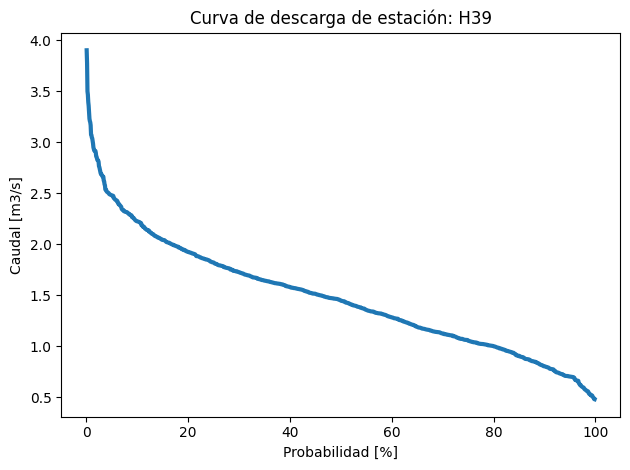

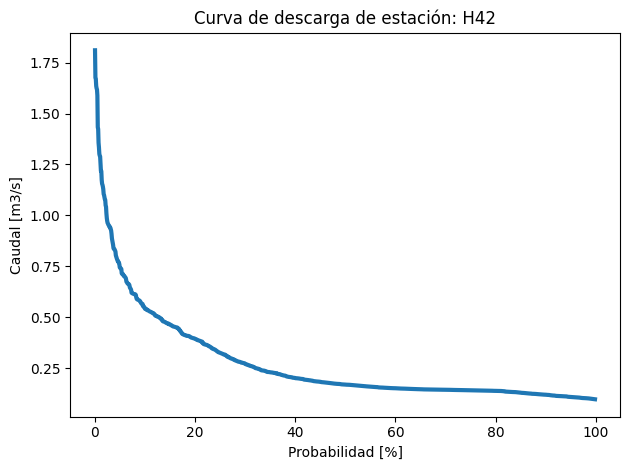

In [8]:
Datos = LeerArchivos()
Estaciones = Estaciones()